<a href="https://colab.research.google.com/github/akukudala/Data_601/blob/main/Assignment05/Assignment05_601_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('RollingSystemDemand_20220330_1925_new.csv',index_col= False, skiprows = 1, header=None, skipfooter =1)
# We are skipping the row 1 and footer row as we have unwanted data
print(df)

       0               1      2
0     VD  20220301000000  27819
1     VD  20220301000500  27792
2     VD  20220301001000  27763
3     VD  20220301001500  27709
4     VD  20220301002000  27698
...   ..             ...    ...
1995  VD  20220307221500  32338
1996  VD  20220307222000  31970
1997  VD  20220307222500  31629
1998  VD  20220307223000  31358
1999  VD  20220307223500  31067

[2000 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [105]:
df.columns = ['VD', 'DateTime', 'Demand']
# Adding appropriate Column Names
df

,VD,DateTime,Demand
0,VD,20220301000000,27819
1,VD,20220301000500,27792
2,VD,20220301001000,27763
3,VD,20220301001500,27709
4,VD,20220301002000,27698
...,...,...,...
1995,VD,20220307221500,32338
1996,VD,20220307222000,31970
1997,VD,20220307222500,31629
1998,VD,20220307223000,31358


In [106]:
df['DateTime'] = pd.to_datetime(df['DateTime'].astype(str), format='%Y%m%d%H%M%S')
#Converting the DateTime column to Date format
df

,VD,DateTime,Demand
0,VD,2022-03-01 00:00:00,27819
1,VD,2022-03-01 00:05:00,27792
2,VD,2022-03-01 00:10:00,27763
3,VD,2022-03-01 00:15:00,27709
4,VD,2022-03-01 00:20:00,27698
...,...,...,...
1995,VD,2022-03-07 22:15:00,32338
1996,VD,2022-03-07 22:20:00,31970
1997,VD,2022-03-07 22:25:00,31629
1998,VD,2022-03-07 22:30:00,31358


In [107]:
df1 = df.resample('H', on= 'DateTime')
# Calculating mean based on Hour value
dfmean = df1.Demand.mean()
dfmean

DateTime
2022-03-01 00:00:00    28013.000000
2022-03-01 01:00:00    27668.916667
2022-03-01 02:00:00    27107.333333
2022-03-01 03:00:00    26453.500000
2022-03-01 04:00:00    26309.750000
                           ...     
2022-03-07 18:00:00    41676.750000
2022-03-07 19:00:00    40682.416667
2022-03-07 20:00:00    37684.416667
2022-03-07 21:00:00    34221.250000
2022-03-07 22:00:00    32042.000000
Freq: H, Name: Demand, Length: 167, dtype: float64

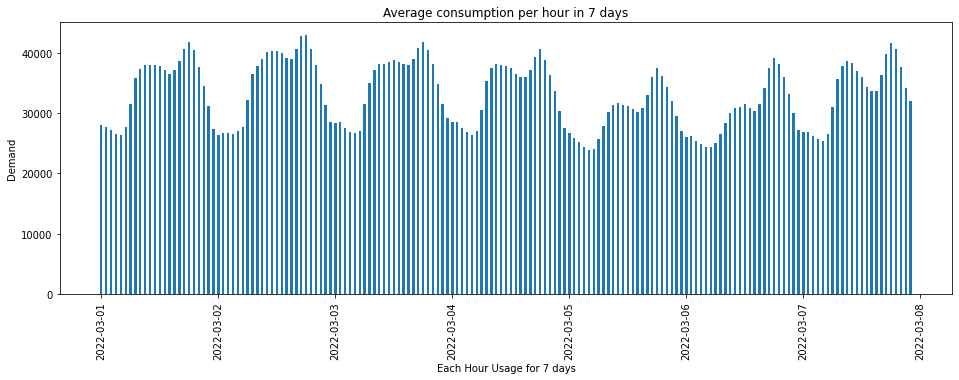

In [109]:
# Solution Bar chart for the question 2
plt.figure(figsize = (16, 5))
plt.bar(dfmean.index, dfmean.values, width=0.02)
plt.title("Average consumption per hour in 7 days")
plt.xlabel("Each Hour Usage for 7 days")
plt.ylabel("Demand")
plt.xticks(rotation=90)
plt.show()

In [110]:
df2 = pd.DataFrame({'Date_and_Time':dfmean.index,'Demand':dfmean})
df2

,Date_and_Time,Demand
DateTime,,
2022-03-01 00:00:00,2022-03-01 00:00:00,28013.000000
2022-03-01 01:00:00,2022-03-01 01:00:00,27668.916667
2022-03-01 02:00:00,2022-03-01 02:00:00,27107.333333
2022-03-01 03:00:00,2022-03-01 03:00:00,26453.500000
2022-03-01 04:00:00,2022-03-01 04:00:00,26309.750000
...,...,...
2022-03-07 18:00:00,2022-03-07 18:00:00,41676.750000
2022-03-07 19:00:00,2022-03-07 19:00:00,40682.416667
2022-03-07 20:00:00,2022-03-07 20:00:00,37684.416667


In [111]:
df2['Date'] = [d.date() for d in df2['Date_and_Time']]
df2['Time'] = [d.time() for d in df2['Date_and_Time']]
df2

,Date_and_Time,Demand,Date,Time
DateTime,,,,
2022-03-01 00:00:00,2022-03-01 00:00:00,28013.000000,2022-03-01,00:00:00
2022-03-01 01:00:00,2022-03-01 01:00:00,27668.916667,2022-03-01,01:00:00
2022-03-01 02:00:00,2022-03-01 02:00:00,27107.333333,2022-03-01,02:00:00
2022-03-01 03:00:00,2022-03-01 03:00:00,26453.500000,2022-03-01,03:00:00
2022-03-01 04:00:00,2022-03-01 04:00:00,26309.750000,2022-03-01,04:00:00
...,...,...,...,...
2022-03-07 18:00:00,2022-03-07 18:00:00,41676.750000,2022-03-07,18:00:00
2022-03-07 19:00:00,2022-03-07 19:00:00,40682.416667,2022-03-07,19:00:00
2022-03-07 20:00:00,2022-03-07 20:00:00,37684.416667,2022-03-07,20:00:00


In [112]:
df3 = df2.groupby(['Time']).agg(
    Hours_Mean = ('Demand', 'mean'))

df3

,Hours_Mean
Time,
00:00:00,27260.333333
01:00:00,27186.488095
02:00:00,26504.380952
03:00:00,25938.476190
04:00:00,25739.904762
05:00:00,26315.095238
06:00:00,29627.833333
07:00:00,33198.642857
08:00:00,35148.523810


In [113]:
df4 = pd.DataFrame({'time':df3.index,'Demand':df3.Hours_Mean})
df4['time'] = df4['time'].astype(str)
df4

,time,Demand
Time,,
00:00:00,00:00:00,27260.333333
01:00:00,01:00:00,27186.488095
02:00:00,02:00:00,26504.380952
03:00:00,03:00:00,25938.476190
04:00:00,04:00:00,25739.904762
05:00:00,05:00:00,26315.095238
06:00:00,06:00:00,29627.833333
07:00:00,07:00:00,33198.642857
08:00:00,08:00:00,35148.523810


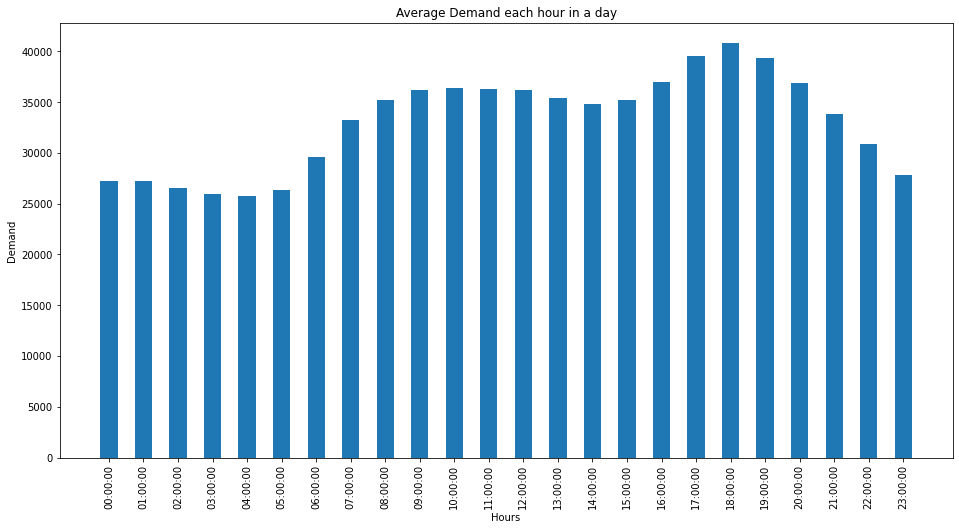

In [114]:

plt.figure(figsize = (16, 8))
plt.bar(df4['time'].values, df3['Hours_Mean'].values, width = 0.50)
plt.title("Average Demand each hour in a day")
plt.xlabel('Hours')
plt.ylabel('Demand')
plt.xticks(rotation = 90)
plt.show()